In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
cd /content/drive/MyDrive/Colab_Notebooks/projet_6

/content/drive/MyDrive/Colab_Notebooks/projet_6


In [3]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('averaged_perceptron_tagger')
nltk.download('punkt')
nltk.download('universal_tagset')
from functions import *

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package universal_tagset to /root/nltk_data...
[nltk_data]   Unzipping taggers/universal_tagset.zip.


In [4]:
data_final = pd.read_csv("data_final.csv", )

In [5]:
data_final.head(5)

,categ_0,description,description_clean
0,home furnishing,Key Features of Elegance Polyester Multicolor ...,elegance polyester abstract eyelet door curtai...
1,baby care,Specifications of Sathiyas Cotton Bath Towel (...,sathiyas cotton bath towel bath towel yellow b...
2,baby care,Key Features of Eurospa Cotton Terry Face Towe...,eurospa cotton terry face towel small gsm euro...
3,home furnishing,Key Features of SANTOSH ROYAL FASHION Cotton P...,santosh royal fashion cotton printed king size...
4,home furnishing,Key Features of Jaipur Print Cotton Floral Kin...,jaipur print cotton floral king sized double b...


In [6]:
def final_clean(doc):
    new_doc = process_text(doc,
                           rejoin=True,
                           lemm_or_stemm="lem",
                           list_rare_words="min_3_words_lem",
                           tag_to_keep=None,
                           min_len_word=3,
                           force_is_alpha=True,
                           engl_words=False,
                           keep_brands=True,
                           extra_words="duplicated_5",
                           no_duplicate=False)
    return new_doc

In [7]:
#df["description_clean"] = df["description"].apply(final_clean)

# Bag of words

In [8]:
l_cat = list(set(data_final['categ_0']))
y_cat_num = [(1-l_cat.index(data_final.iloc[i]['categ_0'])) for i in range(len(data_final))]

## CountVectorizer

In [9]:
# création du bag of words

cvect = CountVectorizer(stop_words='english', max_df=0.95, min_df=1)

feat = 'description_clean'
cv_fit = cvect.fit(data_final[feat])

cv_transform = cvect.transform(data_final[feat])  


In [10]:
cv_transform.todense()

matrix([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]])

In [11]:
print("CountVectorizer : ")
print("-----------------")
ARI, X_tsne, labels = ARI_fct(cv_transform, l_cat, y_cat_num)
print()

CountVectorizer : 
-----------------
ARI :  0.4122 time :  14.0



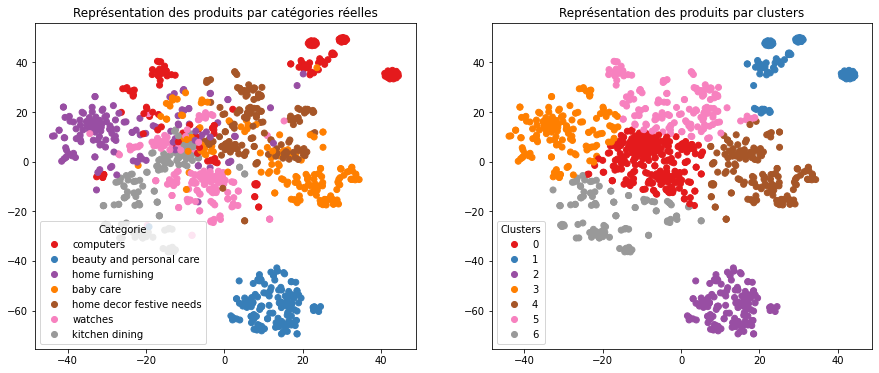

ARI :  0.4122


In [12]:
 TSNE_visu_fct(X_tsne, y_cat_num, l_cat, labels, ARI)

## TF-idf

### Unigram

In [13]:
def final_clean(doc):
    new_doc = process_text(doc,
                           rejoin=True,
                           lemm_or_stemm="lem",
                           list_rare_words=None,
                           tag_to_keep=None,
                           min_len_word=3,
                           force_is_alpha=True,
                           engl_words=False,
                           keep_brands=True,
                           extra_words="duplicated_5",
                           no_duplicate=False)
    return new_doc

In [14]:
data_final["description_clean"] = data_final["description"].apply(final_clean)

In [15]:
# création du bag of words
ctf = TfidfVectorizer()
results = ctf.fit_transform(data_final["description_clean"])

In [16]:
print(results.toarray(), results.toarray().shape)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]] (1050, 4227)


In [17]:
dict_idf_unigram = ctf.vocabulary_
df_idf_unigram = pd.DataFrame.from_dict(dict_idf_unigram, orient = 'index')

In [18]:
df_idf_unigram.sort_values(by = 0, ascending = False)

,0
zyxel,4226
zora,4225
zoom,4224
zone,4223
zippered,4222
...,...
ability,4
aarika,3
aari,2
aapno,1


In [19]:
def color(val):
    
    color = 'mediumaquamarine' if val > 0 else ''
    return 'background-color: %s' % color

In [20]:
feature_names = ctf.get_feature_names_out()
dense = results.todense()
denselist = dense.tolist()
df = pd.DataFrame(denselist[:20], columns=feature_names)
df.style.set_caption("Term Frequency - Inverse Document Frequency of Document")
df.style.applymap(color)

Output hidden; open in https://colab.research.google.com to view.

In [21]:
describe = df.describe()

In [22]:
describe.T.sort_values( by = "mean", ascending = False).head(20)

,count,mean,std,min,25%,50%,75%,max
boy,20.0,0.176479,0.131589,0.0,0.050894,0.207014,0.296209,0.375994
watch,20.0,0.175121,0.121104,0.0,0.100647,0.178917,0.267341,0.346374
men,20.0,0.123870,0.133820,0.0,0.000000,0.058036,0.220438,0.351939
analog,20.0,0.104459,0.129905,0.0,0.000000,0.019582,0.206015,0.333270
digital,20.0,0.078576,0.137227,0.0,0.000000,0.000000,0.102342,0.421699
discount,20.0,0.070074,0.063531,0.0,0.000000,0.087437,0.130316,0.165417
towel,20.0,0.053730,0.165578,0.0,0.000000,0.000000,0.000000,0.562468
sheet,20.0,0.046710,0.147182,0.0,0.000000,0.000000,0.000000,0.564217
maserati,20.0,0.039370,0.176066,0.0,0.000000,0.000000,0.000000,0.787392
elegance,20.0,0.039028,0.127360,0.0,0.000000,0.000000,0.000000,0.520707


#### K-means after T-SNE

In [23]:
print("Tf-idf : ")
print("-----------------")
ARI, X_tsne, labels = ARI_fct(results,l_cat, y_cat_num)
print()

Tf-idf : 
-----------------
ARI :  0.5666 time :  11.0



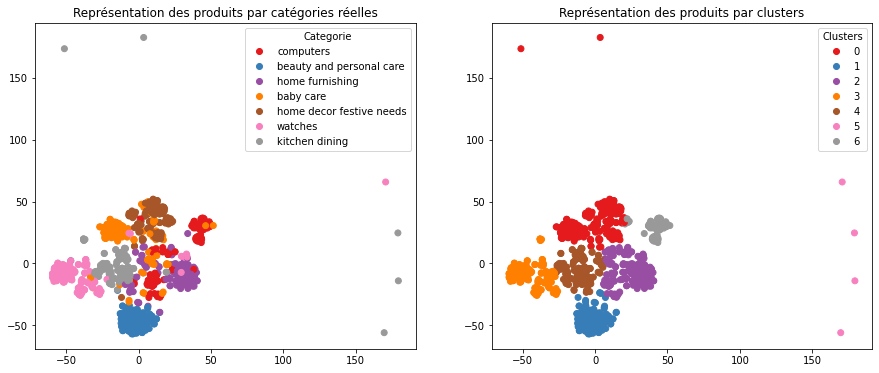

ARI :  0.5666


In [24]:
 TSNE_visu_fct(X_tsne, y_cat_num, l_cat, labels, ARI)

### Bigram

In [25]:
def final_clean(doc):
    new_doc = process_text(doc,
                           rejoin=True,
                           lemm_or_stemm="lem",
                           list_rare_words=None,
                           tag_to_keep=["NOUN","VERB","ADJ"],
                           min_len_word=3,
                           force_is_alpha=True,
                           engl_words=False,
                           keep_brands=True,
                           extra_words="duplicated_5",
                           no_duplicate=False)
    return new_doc

In [26]:
data_final["description_clean"] = data_final["description"].apply(final_clean)

In [27]:
# création du bag of words
ctf = TfidfVectorizer(ngram_range = (2,2))
results = ctf.fit_transform(data_final["description_clean"])

In [28]:
dict_idf_bigram = ctf.vocabulary_
df_idf_bigram = pd.DataFrame.from_dict(dict_idf_bigram, orient = 'index')

In [29]:
df_idf_bigram.sort_values(by = 0, ascending = False).head(5)

,0
zyxel wireless,14211
zyxel data,14210
zora laptop,14209
zoom lamp,14208
zone protector,14207


In [30]:
feature_names = ctf.get_feature_names_out()
dense = results.todense()
denselist = dense.tolist()
df = pd.DataFrame(denselist[:20], columns=feature_names)


In [31]:
describe = df.describe()

In [32]:
describe.T.sort_values( by = "mean", ascending = False).head(20)

,count,mean,std,min,25%,50%,75%,max
watch men,20.0,0.093283,0.137869,0.0,0.0,0.0,0.152359,0.431911
analog watch,20.0,0.085027,0.133786,0.0,0.0,0.0,0.109977,0.384103
discount boy,20.0,0.073258,0.119353,0.0,0.0,0.0,0.163149,0.306987
watch boy,20.0,0.067912,0.101373,0.0,0.0,0.0,0.158080,0.262551
boy boy,20.0,0.067539,0.123891,0.0,0.0,0.0,0.038710,0.318032
men discount,20.0,0.048765,0.101272,0.0,0.0,0.0,0.000000,0.272564
analog men,20.0,0.044307,0.106209,0.0,0.0,0.0,0.000000,0.398476
bath towel,20.0,0.039147,0.150058,0.0,0.0,0.0,0.000000,0.667137
boy discount,20.0,0.034392,0.084374,0.0,0.0,0.0,0.000000,0.251404
sheet sheet,20.0,0.031775,0.098448,0.0,0.0,0.0,0.000000,0.352502


#### K-means after T-SNE

In [33]:
print("Tf-idf : ")
print("-----------------")
ARI, X_tsne, labels = ARI_fct(results,l_cat, y_cat_num)
print()

Tf-idf : 
-----------------
ARI :  0.2008 time :  12.0



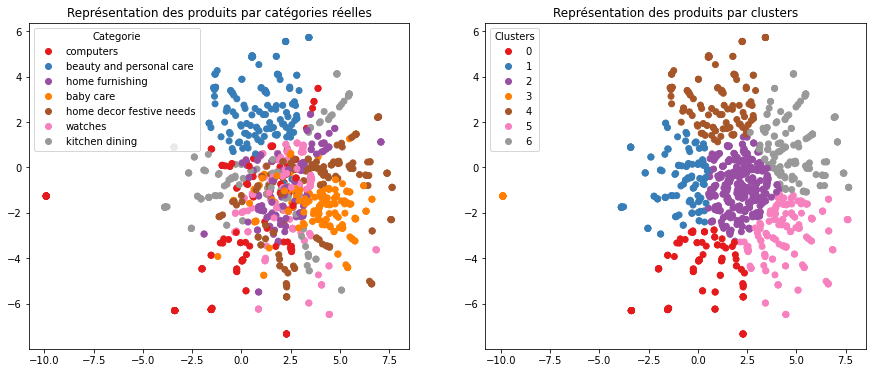

ARI :  0.2008


In [34]:
 TSNE_visu_fct(X_tsne, y_cat_num, l_cat, labels, ARI)

# lda

In [35]:
!pip install pyLDAvis

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.7 MB 29.4 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
  Created wheel for pyLDAvis: filename=pyLDAvis-3.3.1-py2.py3-none-any.whl size=136898 sha256=92b9afce7df8a2dc3897b88daa3a6d538429c1b5a1323850251cbb096f9b47ed
  Stored in directory: /root/.cache/pip/wheels/c9/21/f6/17bcf2667e8a68532ba2fbf6d5c72fdf4c7f7d9abfa4852d2f
  Created wheel for sklearn: filename=sklearn-0.0-py2.py3-none-any.whl size=1310 sha256=f03cca430588c192ae279fec3be7b3b388a891c08afad46c3f25ea3e936582a1
  Stored in directory: /root/.cache/pip/wheels/46/ef/c3/157e41f5ee1372d1be90b09f74f82b10e391eaacca8f22d33e
Successfully built pyLDAvis sklearn


In [36]:
!pip install gensim --upgrade

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 24.1 MB 1.2 MB/s 
  Attempting uninstall: gensim
    Found existing installation: gensim 3.6.0
    Uninstalling gensim-3.6.0:
      Successfully uninstalled gensim-3.6.0


In [37]:
import gensim
import pprint
from gensim import corpora
from gensim.utils import simple_preprocess
from gensim.models import TfidfModel
from gensim.models import CoherenceModel
import pyLDAvis
from pyLDAvis import gensim_models as gensimis


/usr/local/lib/python3.7/dist-packages/past/types/oldstr.py:5: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working
  from collections import Iterable
/usr/local/lib/python3.7/dist-packages/past/builtins/misc.py:4: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working
  from collections import Mapping


In [38]:
def final_clean(doc):
    new_doc = process_text(doc,
                           rejoin=True,
                           lemm_or_stemm="lem",
                           list_rare_words=None,
                           tag_to_keep=None,
                           min_len_word=3,
                           force_is_alpha=True,
                           engl_words=False,
                           keep_brands=True,
                           extra_words="duplicated_5",
                           no_duplicate=False)
    return new_doc

In [39]:
data_final["description_clean"] = data_final["description"].apply(final_clean)

doc_list = data_final["description_clean"].tolist()

doc_tokenized = [simple_preprocess(x) for x in doc_list]

id2word = corpora.Dictionary(doc_tokenized)

id2word.filter_extremes(no_below=15, no_above=0.1)

corpus = [id2word.doc2bow(doc) for doc in doc_tokenized]

In [40]:
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=7, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=10,
                                           passes=10,
                                           alpha='symmetric',
                                           iterations=100,
                                           per_word_topics=True)

In [41]:
topics = lda_model.print_topics(num_words=6)
for topic in topics:
    print(topic)

(0, '0.120*"baby" + 0.092*"shirt" + 0.088*"boy" + 0.086*"comfort" + 0.067*"sleeve" + 0.061*"girl"')
(1, '0.183*"sticker" + 0.157*"wall" + 0.110*"apply" + 0.110*"vinyl" + 0.064*"remove" + 0.053*"resistant"')
(2, '0.186*"print" + 0.068*"fit" + 0.060*"room" + 0.053*"self" + 0.045*"floral" + 0.042*"kitchen"')
(3, '0.501*"skin" + 0.114*"showpiece" + 0.091*"towel" + 0.060*"piece" + 0.037*"cream" + 0.034*"brass"')
(4, '0.090*"combo" + 0.083*"polyester" + 0.069*"sheet" + 0.066*"wash" + 0.062*"eyelet" + 0.050*"printed"')
(5, '0.186*"brown" + 0.115*"casual" + 0.108*"code" + 0.083*"led" + 0.077*"round" + 0.076*"occasion"')
(6, '0.316*"laptop" + 0.139*"pad" + 0.082*"usb" + 0.072*"mug" + 0.044*"summary" + 0.040*"compatible"')


In [42]:
# Visualize the topics
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim_models.prepare(lda_model, corpus, id2word)
vis

/usr/local/lib/python3.7/dist-packages/pyLDAvis/_prepare.py:247: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  by='saliency', ascending=False).head(R).drop('saliency', 1)


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
4      0.298786 -0.003059       1        1  18.595167
0     -0.175947 -0.189972       2        1  17.512327
6     -0.145601  0.398060       3        1  17.235109
2      0.268388 -0.007665       4        1  16.184631
5     -0.061375 -0.011569       5        1  13.452712
1     -0.144272 -0.185690       6        1   8.713468
3     -0.039979 -0.000106       7        1   8.306587, topic_info=       Term        Freq       Total Category  logprob  loglift
33     skin  506.000000  506.000000  Default  30.0000  30.0000
205  laptop  661.000000  661.000000  Default  29.0000  29.0000
10    print  366.000000  366.000000  Default  28.0000  28.0000
143   brown  304.000000  304.000000  Default  27.0000  27.0000
175     pad  290.000000  290.000000  Default  26.0000  26.0000
..      ...         ...         ...      ...      ...      ...
93     soap    0.091892   73.929342   Topic7  -9.3032  -4.2021
191     yet    0.090257   14.454757   Topic7  -9.3212  -2.5880
145  wooden    0.090220   27.907033   Topic7  -9.3216  -3.2463
175     pad    0.092351  290.523192   Topic7  -9.2982  -5.5657
104   would    0.090478   61.716276   Topic7  -9.3187  -4.0371

[274 rows x 6 columns], token_table=      Topic      Freq       Term
term                            
0         1  0.985070   abstract
45        6  0.783698  accessory
203       4  0.952399    adapter
150       6  0.996421      apply
113       4  0.990981       area
...     ...       ...        ...
141       5  0.977023       wood
145       6  0.967498     wooden
104       4  0.988394      would
22        2  0.989467     yellow
191       1  0.968539        yet

[188 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[5, 1, 7, 3, 6, 2, 4])

In [43]:
from gensim.models import CoherenceModel
# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=lda_model, texts=doc_tokenized, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Coherence Score:  0.43337391983608803


In [44]:
# supporting function
def compute_coherence_values(corpus, dictionary, k, a, b):
    
    lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                           id2word=dictionary,
                                           num_topics=k, 
                                           random_state=100,
                                           chunksize=100,
                                           passes=10,
                                           alpha=a,
                                           eta=b)
    
    coherence_model_lda = CoherenceModel(model=lda_model, texts=doc_tokenized, dictionary=id2word, coherence='c_v')
    
    return coherence_model_lda.get_coherence()

In [46]:
import numpy as np
import tqdm
grid = {}
grid['Validation_Set'] = {}
# Topics range
min_topics = 4
max_topics = 10
step_size = 1
topics_range = range(min_topics, max_topics, step_size)
# Alpha parameter
alpha = list(np.arange(0.01, 1, 0.3))
alpha.append('symmetric')
alpha.append('asymmetric')
# Beta parameter
beta = list(np.arange(0.01, 1, 0.3))
beta.append('symmetric')
# Validation sets
num_of_docs = len(corpus)
corpus_sets = [# gensim.utils.ClippedCorpus(corpus, num_of_docs*0.25), 
               # gensim.utils.ClippedCorpus(corpus, num_of_docs*0.5), 
               #gensim.utils.ClippedCorpus(corpus, int(num_of_docs*0.75)), 
               corpus]
corpus_title = ['75% Corpus', '100% Corpus']
model_results = {'Validation_Set': [],
                 'Topics': [],
                 'Alpha': [],
                 'Beta': [],
                 'Coherence': []
                }
# Can take a long time to run
if 1 == 1:
    pbar = tqdm.tqdm(total=180)
    
    # iterate through validation corpuses
    for i in range(len(corpus_sets)):
        # iterate through number of topics
        for k in topics_range:
            # iterate through alpha values
            for a in alpha:
                # iterare through beta values
                for b in beta:
                    # get the coherence score for the given parameters
                    cv = compute_coherence_values(corpus=corpus_sets[i], dictionary=id2word, 
                                                  k=k, a=a, b=b)
                    # Save the model results
                    model_results['Validation_Set'].append(corpus_title[i])
                    model_results['Topics'].append(k)
                    model_results['Alpha'].append(a)
                    model_results['Beta'].append(b)
                    model_results['Coherence'].append(cv)
                    
                    pbar.update(1)
    pd.DataFrame(model_results).to_csv('lda_tuning_results.csv', index=False)
    pbar.close()

100%|██████████| 180/180 [09:36<00:00,  3.20s/it]


In [47]:
results = pd.DataFrame(model_results)

In [48]:
results

,Validation_Set,Topics,Alpha,Beta,Coherence
0,75% Corpus,4,0.01,0.01,0.407291
1,75% Corpus,4,0.01,0.31,0.360102
2,75% Corpus,4,0.01,0.61,0.366723
3,75% Corpus,4,0.01,0.91,0.380734
4,75% Corpus,4,0.01,symmetric,0.361625
...,...,...,...,...,...
175,75% Corpus,9,asymmetric,0.01,0.381231
176,75% Corpus,9,asymmetric,0.31,0.447235
177,75% Corpus,9,asymmetric,0.61,0.469033
178,75% Corpus,9,asymmetric,0.91,0.478650


## tf idf

In [50]:
tfidf = gensim.models.TfidfModel(corpus)
corpus_tfidf = tfidf[corpus]

In [52]:
lda_model_tf_idf = gensim.models.LdaMulticore(corpus_tfidf, 
                                       num_topics=7, 
                                       id2word = id2word, 
                                       passes = 10, 
                                       workers=2)

In [53]:
topics = lda_model_tf_idf.print_topics(num_words=6)
for topic in topics:
    print(topic)

(0, '0.076*"towel" + 0.062*"kadhai" + 0.043*"bath" + 0.039*"steel" + 0.033*"printed" + 0.027*"code"')
(1, '0.102*"usb" + 0.054*"led" + 0.050*"lowest" + 0.038*"adapter" + 0.036*"power" + 0.031*"wood"')
(2, '0.091*"baby" + 0.081*"girl" + 0.047*"dress" + 0.034*"glass" + 0.028*"neck" + 0.028*"boy"')
(3, '0.224*"showpiece" + 0.069*"abstract" + 0.067*"blanket" + 0.066*"single" + 0.057*"double" + 0.052*"quilt"')
(4, '0.178*"combo" + 0.097*"woman" + 0.042*"laptop" + 0.039*"battery" + 0.036*"skin" + 0.034*"dial"')
(5, '0.076*"mug" + 0.058*"ceramic" + 0.041*"digital" + 0.028*"polyester" + 0.027*"coffee" + 0.026*"prithish"')
(6, '0.153*"men" + 0.062*"sonata" + 0.051*"boy" + 0.048*"router" + 0.041*"wireless" + 0.035*"bottle"')


In [55]:
# Visualize the topics
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim_models.prepare(lda_model_tf_idf, corpus_tfidf, id2word)
vis

/usr/local/lib/python3.7/dist-packages/pyLDAvis/_prepare.py:247: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  by='saliency', ascending=False).head(R).drop('saliency', 1)


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
4      0.074084  0.128504       1        1  16.764436
5      0.170699 -0.124159       2        1  16.689681
2     -0.133047 -0.128535       3        1  15.164547
0     -0.100850 -0.162809       4        1  13.914769
1      0.018546  0.223088       5        1  13.337954
6      0.187640 -0.029924       6        1  12.593957
3     -0.217072  0.093835       7        1  11.534656, topic_info=          Term       Freq      Total Category  logprob  loglift
147  showpiece  58.000000  58.000000  Default  30.0000  30.0000
75       combo  61.000000  61.000000  Default  29.0000  29.0000
17         men  45.000000  45.000000  Default  28.0000  28.0000
110        usb  28.000000  28.000000  Default  27.0000  27.0000
21       woman  33.000000  33.000000  Default  26.0000  26.0000
..         ...        ...        ...      ...      ...      ...
10       print   0.967294  15.466631   Topic7  -5.4595  -0.6121
75       combo   2.466833  61.983497   Topic7  -4.5233  -1.0641
95        baby   1.342606  34.827512   Topic7  -5.1317  -1.0960
38     printed   0.965016  17.704237   Topic7  -5.4619  -0.7496
15        girl   0.804625  31.813881   Topic7  -5.6437  -1.5175

[287 rows x 6 columns], token_table=      Topic      Freq       Term
term                            
0         2  0.057955   abstract
0         7  0.927277   abstract
45        3  0.375348  accessory
45        5  0.375348  accessory
123       1  0.301446     actual
...     ...       ...        ...
22        4  0.177206     yellow
22        5  0.265808     yellow
22        7  0.177206     yellow
191       2  0.676272        yet
191       5  0.169068        yet

[432 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[5, 6, 3, 1, 2, 7, 4])

### best numbers of categories

In [ ]:
from gensim.models import CoherenceModel
# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=lda_model, texts=doc_tokenized, dictionary=dictionary, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)

In [ ]:
# supporting function
def compute_coherence_values(corpus, dictionary, k, a, b):
    
    lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                           id2word=dictionary,
                                           num_topics=k, 
                                           random_state=100,
                                           chunksize=100,
                                           passes=10,
                                           alpha=a,
                                           eta=b)
    
    coherence_model_lda = CoherenceModel(model=lda_model, texts=data_lemmatized, dictionary=id2word, coherence='c_v')
    
    return coherence_model_lda.get_coherence()

In [ ]:
import numpy as np
import tqdm
grid = {}
grid['Validation_Set'] = {}
# Topics range
min_topics = 3
max_topics = 10
step_size = 1
topics_range = range(min_topics, max_topics, step_size)
# Alpha parameter
alpha = list(np.arange(0.01, 1, 0.3))
alpha.append('symmetric')
alpha.append('asymmetric')
# Beta parameter
beta = list(np.arange(0.01, 1, 0.3))
beta.append('symmetric')
# Validation sets
num_of_docs = len(corpus_tfidf)
corpus_sets = [# gensim.utils.ClippedCorpus(corpus, num_of_docs*0.25), 
               # gensim.utils.ClippedCorpus(corpus, num_of_docs*0.5), 
               gensim.utils.ClippedCorpus(corpus_tfidf, num_of_docs*0.75), 
               corpus_tfidf]
corpus_title = ['75% Corpus', '100% Corpus']
model_results = {'Validation_Set': [],
                 'Topics': [],
                 'Alpha': [],
                 'Beta': [],
                 'Coherence': []
                }
# Can take a long time to run
if 1 == 1:
    pbar = tqdm.tqdm(total=540)
    
    # iterate through validation corpuses
    for i in range(len(corpus_sets)):
        # iterate through number of topics
        for k in topics_range:
            # iterate through alpha values
            for a in alpha:
                # iterare through beta values
                for b in beta:
                    # get the coherence score for the given parameters
                    cv = compute_coherence_values(corpus=corpus_sets[i], dictionary=dictionary, 
                                                  k=k, a=a, b=b)
                    # Save the model results
                    model_results['Validation_Set'].append(corpus_title[i])
                    model_results['Topics'].append(k)
                    model_results['Alpha'].append(a)
                    model_results['Beta'].append(b)
                    model_results['Coherence'].append(cv)
                    
                    pbar.update(1)
    pd.DataFrame(model_results).to_csv('lda_tuning_results.csv', index=False)
    pbar.close()

In [ ]:
# Can take a long time to run.
model_list, coherence_values = compute_coherence_values(dictionary=id2word, corpus=corpus, texts=data_lemmatized, start=2, limit=10, step=6)

## bigram

In [56]:
def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))  # deacc=True removes punctuations

data_words = list(sent_to_words(doc_list))

print(data_words[:1])

# Build the bigram and trigram models
bigram = gensim.models.Phrases(data_words, min_count=5, threshold=10) # higher threshold fewer phrases.
trigram = gensim.models.Phrases(bigram[data_words], threshold=100)  

# Faster way to get a sentence clubbed as a trigram/bigram
bigram_mod = gensim.models.phrases.Phraser(bigram)
trigram_mod = gensim.models.phrases.Phraser(trigram)

[['elegance', 'polyester', 'abstract', 'eyelet', 'door', 'curtain', 'floral', 'curtain', 'elegance', 'polyester', 'abstract', 'eyelet', 'door', 'curtain', 'curtain', 'enhances', 'interior', 'curtain', 'polyester', 'fabric', 'eyelet', 'stitch', 'ring', 'room', 'environment', 'romantic', 'loving', 'curtain', 'ant', 'wrinkle', 'anti', 'shrinkage', 'elegant', 'apparance', 'give', 'bright', 'modernistic', 'appeal', 'surreal', 'attention', 'steal', 'heart', 'contemporary', 'eyelet', 'valance', 'curtain', 'slide', 'smoothly', 'draw', 'apart', 'first', 'thing', 'morning', 'welcome', 'bright', 'sun', 'ray', 'want', 'wish', 'morning', 'whole', 'draw', 'close', 'evening', 'create', 'special', 'moment', 'joyous', 'beauty', 'given', 'soothing', 'print', 'bring', 'elegant', 'curtain', 'softly', 'filter', 'room', 'right', 'amount', 'sunlight', 'elegance', 'polyester', 'abstract', 'eyelet', 'door', 'curtain', 'elegance', 'door', 'eyelet', 'abstract', 'polyester', 'door', 'curtain', 'curtain', 'polyest

In [57]:
def make_bigrams(texts):
    return [bigram_mod[doc] for doc in texts]

def make_trigrams(texts):
    return [trigram_mod[bigram_mod[doc]] for doc in texts]

In [58]:
doc_final = make_bigrams(data_words)
doc_final_2 = make_trigrams(data_words)

In [59]:
# Create Dictionary
id2word = corpora.Dictionary(doc_final)

# Create Corpus
texts = doc_final

# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]

# View
print(corpus[:1])

[[(0, 4), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 2), (10, 1), (11, 1), (12, 1), (13, 1), (14, 10), (15, 1), (16, 1), (17, 2), (18, 4), (19, 2), (20, 1), (21, 1), (22, 1), (23, 2), (24, 3), (25, 1), (26, 1), (27, 1), (28, 1), (29, 1), (30, 1), (31, 1), (32, 1), (33, 1), (34, 1), (35, 1), (36, 1), (37, 2), (38, 6), (39, 1), (40, 1), (41, 1), (42, 1), (43, 1), (44, 2), (45, 1), (46, 1), (47, 1), (48, 1), (49, 1), (50, 1), (51, 1), (52, 1), (53, 1), (54, 1), (55, 1), (56, 1), (57, 1), (58, 1), (59, 1), (60, 1), (61, 1), (62, 1)]]


In [60]:
# Human readable format of corpus (term-frequency)
[[(id2word[id], freq) for id, freq in cp] for cp in corpus[:1]]

[[('abstract', 4),
  ('amount', 1),
  ('ant', 1),
  ('anti', 1),
  ('apart', 1),
  ('apparance', 1),
  ('appeal', 1),
  ('attention', 1),
  ('beauty', 1),
  ('bright', 2),
  ('bring', 1),
  ('close', 1),
  ('contemporary', 1),
  ('create', 1),
  ('curtain', 10),
  ('door_curtain', 1),
  ('door_eyelet', 1),
  ('draw', 2),
  ('elegance', 4),
  ('elegant', 2),
  ('enhances', 1),
  ('environment', 1),
  ('evening', 1),
  ('eyelet', 2),
  ('eyelet_door', 3),
  ('fabric', 1),
  ('filter', 1),
  ('first', 1),
  ('floral', 1),
  ('give', 1),
  ('given', 1),
  ('heart', 1),
  ('interior', 1),
  ('joyous', 1),
  ('loving', 1),
  ('modernistic', 1),
  ('moment', 1),
  ('morning', 2),
  ('polyester', 6),
  ('print', 1),
  ('ray', 1),
  ('right', 1),
  ('ring', 1),
  ('romantic', 1),
  ('room', 2),
  ('shrinkage', 1),
  ('slide', 1),
  ('smoothly', 1),
  ('softly', 1),
  ('soothing', 1),
  ('special', 1),
  ('steal', 1),
  ('stitch', 1),
  ('sun', 1),
  ('sunlight', 1),
  ('surreal', 1),
  ('thing'

In [61]:
# Build LDA model
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=7, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           alpha='auto',
                                           per_word_topics=True)

In [62]:
# Print the Keyword in the 7 topics
doc_lda = lda_model[corpus]

topics = lda_model.print_topics(num_words=7)
for topic in topics:
    print(topic)

(0, '0.065*"laptop_skin" + 0.052*"mouse_pad" + 0.027*"analog_watch" + 0.026*"combo_print" + 0.020*"men" + 0.016*"woman" + 0.014*"watch"')
(1, '0.020*"skin" + 0.019*"wall" + 0.016*"sticker" + 0.012*"apply" + 0.009*"usb" + 0.009*"large" + 0.009*"trait"')
(2, '0.026*"towel" + 0.020*"showpiece" + 0.017*"cotton" + 0.012*"paper" + 0.012*"container" + 0.011*"combo" + 0.010*"poster"')
(3, '0.032*"brown" + 0.015*"brass" + 0.012*"bed" + 0.011*"complete" + 0.010*"leaf" + 0.009*"wooden" + 0.009*"deodorant"')
(4, '0.030*"polyester" + 0.023*"aroma_comfort" + 0.014*"door_curtain" + 0.011*"pot" + 0.011*"stainless_steel" + 0.011*"singing_bowl" + 0.010*"self_eyelet"')
(5, '0.018*"cotton" + 0.017*"baby_girl" + 0.016*"print" + 0.014*"baby_boy" + 0.012*"fabric_cotton" + 0.011*"shirt" + 0.010*"printed"')
(6, '0.027*"mug" + 0.017*"ceramic" + 0.015*"ceramic_mug" + 0.015*"cushion" + 0.013*"carpet" + 0.013*"brush" + 0.011*"eye"')


In [63]:
# Compute Perplexity
print('\nPerplexity: ', lda_model.log_perplexity(corpus))  # a measure of how good the model is. lower the better.

# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=lda_model, texts=doc_final, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Perplexity:  -7.851880861170884

Coherence Score:  0.5343934553624825


In [64]:
# Visualize the topics
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim_models.prepare(lda_model, corpus, id2word)
vis

/usr/local/lib/python3.7/dist-packages/pyLDAvis/_prepare.py:247: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  by='saliency', ascending=False).head(R).drop('saliency', 1)


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
5      0.268549  0.116952       1        1  24.786016
1     -0.263977  0.152051       2        1  18.406774
3     -0.013011 -0.003053       3        1  13.297892
4     -0.102739  0.004925       4        1  12.167484
2      0.070115  0.049251       5        1  11.555721
6      0.056658  0.010403       6        1  10.270784
0     -0.015594 -0.330530       7        1   9.515330, topic_info=                   Term        Freq       Total Category  logprob  loglift
4504        laptop_skin  156.000000  156.000000  Default  30.0000  30.0000
4507          mouse_pad  126.000000  126.000000  Default  29.0000  29.0000
856               brown  107.000000  107.000000  Default  28.0000  28.0000
38            polyester   93.000000   93.000000  Default  27.0000  27.0000
65               cotton  161.000000  161.000000  Default  26.0000  26.0000
...                 ...         ...         ...      ...      ...      ...
2759         round_dial   14.626877   15.310146   Topic7  -5.1071   2.3066
75                woman   38.678979   43.875239   Topic7  -4.1346   2.2262
204   scratch_resistant   30.138682   37.918815   Topic7  -4.3841   2.1226
67                 girl   20.341701   37.486163   Topic7  -4.7773   1.7410
64                  boy   19.052137   56.493752   Topic7  -4.8427   1.2653

[284 rows x 6 columns], token_table=      Topic      Freq            Term
term                                 
2851      6  0.960363       absorbent
0         4  0.950212        abstract
2223      4  0.969657         adapter
149       7  0.995912    analog_watch
3         4  0.964627            anti
...     ...       ...             ...
879       2  0.029810          wooden
879       3  0.953926          wooden
4517      7  0.976461  would_required
76        2  0.322586          yellow
76        5  0.674498          yellow

[286 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[6, 2, 4, 5, 3, 7, 1])

### Clustering text documents using k-means

In [65]:
from collections import defaultdict
from sklearn import metrics

evaluations = []
evaluations_std = []

def fit_and_evaluate(km, X, name=None, n_runs=5):
    name = km.__class__.__name__ if name is None else name

    train_times = []
    scores = defaultdict(list)
    for seed in range(n_runs):
        km.set_params(random_state=seed)
        t0 = time()
        km.fit(X)
        train_times.append(time() - t0)
        scores["Homogeneity"].append(metrics.homogeneity_score(labels, km.labels_))
        scores["Completeness"].append(metrics.completeness_score(labels, km.labels_))
        scores["V-measure"].append(metrics.v_measure_score(labels, km.labels_))
        scores["Adjusted Rand-Index"].append(
            metrics.adjusted_rand_score(labels, km.labels_)
        )
        scores["Silhouette Coefficient"].append(
            metrics.silhouette_score(X, km.labels_, sample_size=2000)
        )
    train_times = np.asarray(train_times)

    print(f"clustering done in {train_times.mean():.2f} ± {train_times.std():.2f} s ")
    evaluation = {
        "estimator": name,
        "train_time": train_times.mean(),
    }
    evaluation_std = {
        "estimator": name,
        "train_time": train_times.std(),
    }
    for score_name, score_values in scores.items():
        mean_score, std_score = np.mean(score_values), np.std(score_values)
        print(f"{score_name}: {mean_score:.3f} ± {std_score:.3f}")
        evaluation[score_name] = mean_score
        evaluation_std[score_name] = std_score
    evaluations.append(evaluation)
    evaluations_std.append(evaluation_std)

In [66]:
labels = data_final.categ_0
unique_labels, category_sizes = np.unique(labels, return_counts=True)
true_k = unique_labels.shape[0]

In [67]:
from time import time
vectorizer = TfidfVectorizer(
    max_df=0.8,
    min_df=3,
    stop_words="english",
)
t0 = time()
X_tfidf = vectorizer.fit_transform(data_final.description)

print(f"vectorization done in {time() - t0:.3f} s")
print(f"n_samples: {X_tfidf.shape[0]}, n_features: {X_tfidf.shape[1]}")

vectorization done in 0.122 s
n_samples: 1050, n_features: 1644


In [68]:
from sklearn.cluster import KMeans

for seed in range(10):
    kmeans = KMeans(
        n_clusters=true_k,
        max_iter=100,
        n_init=1,
        random_state=seed,
    ).fit(X_tfidf)
    cluster_ids, cluster_sizes = np.unique(kmeans.labels_, return_counts=True)
    print(f"Number of elements asigned to each cluster: {cluster_sizes}")
print()
print(
    "True number of documents in each category according to the class labels: "
    f"{category_sizes}")

Number of elements asigned to each cluster: [ 10  80 257 138 140  80 345]
Number of elements asigned to each cluster: [ 17 256  54 483  80 139  21]
Number of elements asigned to each cluster: [ 72  80 245 339  75 167  72]
Number of elements asigned to each cluster: [123 383  81  75  63  81 244]
Number of elements asigned to each cluster: [195 137 300 245  81  33  59]
Number of elements asigned to each cluster: [366 244  42 139 144  40  75]
Number of elements asigned to each cluster: [370  91 285 139  10  75  80]
Number of elements asigned to each cluster: [ 75 260  35 417 110  80  73]
Number of elements asigned to each cluster: [323 137  94 312 102  37  45]
Number of elements asigned to each cluster: [ 18 139 380  54  78 360  21]

True number of documents in each category according to the class labels: [150 150 150 150 150 150 150]


In [69]:
kmeans = KMeans(
    n_clusters=true_k,
    max_iter=100,
    n_init=5,
)

fit_and_evaluate(kmeans, X_tfidf, name="KMeans\non tf-idf vectors")

clustering done in 0.08 ± 0.01 s 
Homogeneity: 0.446 ± 0.017
Completeness: 0.491 ± 0.024
V-measure: 0.467 ± 0.020
Adjusted Rand-Index: 0.260 ± 0.023
Silhouette Coefficient: 0.066 ± 0.005


In [70]:
from sklearn.decomposition import TruncatedSVD
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import Normalizer


lsa = make_pipeline(TruncatedSVD(n_components=100), Normalizer(copy=False))
t0 = time()
X_lsa = lsa.fit_transform(X_tfidf)
explained_variance = lsa[0].explained_variance_ratio_.sum()

print(f"LSA done in {time() - t0:.3f} s")
print(f"Explained variance of the SVD step: {explained_variance * 100:.1f}%")

LSA done in 0.116 s
Explained variance of the SVD step: 59.5%


In [71]:
kmeans = KMeans(
    n_clusters=true_k,
    max_iter=100,
    n_init=1,
)

fit_and_evaluate(kmeans, X_lsa, name="KMeans\nwith LSA on tf-idf vectors")

clustering done in 0.04 ± 0.05 s 
Homogeneity: 0.421 ± 0.020
Completeness: 0.466 ± 0.029
V-measure: 0.442 ± 0.023
Adjusted Rand-Index: 0.265 ± 0.029
Silhouette Coefficient: 0.110 ± 0.018


In [72]:
from sklearn.cluster import MiniBatchKMeans

minibatch_kmeans = MiniBatchKMeans(
    n_clusters=true_k,
    n_init=1,
    init_size=1000,
    batch_size=1000,
)

fit_and_evaluate(
    minibatch_kmeans,
    X_lsa,
    name="MiniBatchKMeans\nwith LSA on tf-idf vectors",
)

clustering done in 0.10 ± 0.07 s 
Homogeneity: 0.393 ± 0.031
Completeness: 0.462 ± 0.030
V-measure: 0.425 ± 0.029
Adjusted Rand-Index: 0.214 ± 0.038
Silhouette Coefficient: 0.100 ± 0.022


In [73]:
original_space_centroids = lsa[0].inverse_transform(kmeans.cluster_centers_)
order_centroids = original_space_centroids.argsort()[:, ::-1]
terms = vectorizer.get_feature_names_out()

for i in range(true_k):
    print(f"Cluster {i}: ", end="")
    for ind in order_centroids[i, :10]:
        print(f"{terms[ind]} ", end="")
    print()

Cluster 0: mug ceramic coffee prithish mugs perfect rockmantra gift loved safe 
Cluster 1: baby girl details fabric boy cotton dress neck sleeve pattern 
Cluster 2: watch analog men discounts india great women online com flipkart 
Cluster 3: showpiece prices best cm online 30 guarantee replacement day buy 
Cluster 4: cm color pack warranty features box model type material inch 
Cluster 5: skin laptop shapes mouse pad print battery set combo oil 
Cluster 6: com flipkart shipping genuine cash delivery products free buy guarantee 


# Embedding

## Word2Vec

In [74]:
import tensorflow as tf
import tensorflow.keras
from tensorflow.keras import backend as K

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras import metrics as kmetrics
from tensorflow.keras.layers import Input, Embedding,GlobalAveragePooling1D
from tensorflow.keras.models import Model


### Création du modèle Word2Vec

In [75]:
def final_clean(doc):
    new_doc = process_text(doc,
                           rejoin=True,
                           lemm_or_stemm="lem",
                           list_rare_words=None,
                           tag_to_keep= None,
                           min_len_word=3,
                           force_is_alpha=True,
                           engl_words=False,
                           keep_brands=True,
                           extra_words="duplicated_6",
                           no_duplicate=False)
    return new_doc

In [76]:
data_final["description_clean"] = data_final["description"].apply(final_clean)

In [77]:
data_final.head(5)

,categ_0,description,description_clean
0,home furnishing,Key Features of Elegance Polyester Multicolor ...,elegance polyester multicolor abstract eyelet ...
1,baby care,Specifications of Sathiyas Cotton Bath Towel (...,sathiyas cotton bath towel bath towel yellow b...
2,baby care,Key Features of Eurospa Cotton Terry Face Towe...,eurospa cotton terry face towel set small inch...
3,home furnishing,Key Features of SANTOSH ROYAL FASHION Cotton P...,santosh royal fashion cotton printed king size...
4,home furnishing,Key Features of Jaipur Print Cotton Floral Kin...,jaipur print cotton floral king sized double b...


In [79]:
max(data_final['description_clean'].str.len())

2086

In [80]:
w2v_size=300
w2v_window=2
w2v_min_count=3
w2v_epochs=100
maxlen = 500 # adapt to length of sentences
sentences = data_final['description_clean'].to_list()
sentences = [gensim.utils.simple_preprocess(text) for text in sentences]

In [81]:
gensim.__version__

'4.2.0'

In [82]:
# Création et entraînement du modèle Word2Vec

print("Build & train Word2Vec model ...")
w2v_model = gensim.models.Word2Vec(min_count=w2v_min_count,
                                   window=w2v_window,
                                   vector_size=w2v_size,
                                   seed=42,
                                   workers=20 #workers=multiprocessing.cpu_count())
                                  )

w2v_model.build_vocab(sentences)
w2v_model.train(sentences, total_examples=w2v_model.corpus_count, epochs=w2v_epochs)
model_vectors = w2v_model.wv
w2v_words = model_vectors.index_to_key
print("Vocabulary size: %i" % len(w2v_words))
print("Word2Vec trained")

Build & train Word2Vec model ...
Vocabulary size: 2029
Word2Vec trained


In [83]:
w2v_model.wv.similarity("ceramic", 'mug')


0.53991544

In [84]:
w2v_model.wv.most_similar(positive=["asus"])

[('memo', 0.9102596640586853),
 ('dsl', 0.7462693452835083),
 ('zyxel', 0.7295424342155457),
 ('gigabit', 0.7214387655258179),
 ('data', 0.6776284575462341),
 ('deployment', 0.6660398840904236),
 ('modem', 0.6650479435920715),
 ('router', 0.6602663993835449),
 ('dynamic', 0.6595865488052368),
 ('band', 0.6595377922058105)]

In [85]:
w2v_model.wv.most_similar(positive=["baby"])

[('sleepsuit', 0.6232358813285828),
 ('rute', 0.6175333857536316),
 ('empire', 0.6078703999519348),
 ('babeezworld', 0.5955271124839783),
 ('bodysuit', 0.5952840447425842),
 ('offspring', 0.5894759297370911),
 ('greenwich', 0.5772443413734436),
 ('jumpsuit', 0.5750315189361572),
 ('gathered', 0.5718778371810913),
 ('portia', 0.5705405473709106)]

In [86]:
w2v_model.wv.most_similar(positive=["mug", "ceramic"], negative=["coffee"], topn=3)


[('akup', 0.5116063356399536),
 ('magic', 0.4713839590549469),
 ('rockmantra', 0.46020811796188354)]

In [87]:
# Préparation des sentences (tokenization)

print("Fit Tokenizer ...")
tokenizer = Tokenizer()
tokenizer.fit_on_texts(sentences)
x_sentences = pad_sequences(tokenizer.texts_to_sequences(sentences),
                                                     maxlen=maxlen,
                                                     padding='post') 
                                                   
num_words = len(tokenizer.word_index) + 1
print("Number of unique words: %i" % num_words)

Fit Tokenizer ...
Number of unique words: 4301


### Création de la matrice d'embedding

In [88]:
# Création de la matrice d'embedding

print("Create Embedding matrix ...")
w2v_size = 300
word_index = tokenizer.word_index
vocab_size = len(word_index) + 1
embedding_matrix = np.zeros((vocab_size, w2v_size))
i=0
j=0
    
for word, idx in word_index.items():
    i +=1
    if word in w2v_words:
        j +=1
        embedding_vector = model_vectors[word]
        if embedding_vector is not None:
            embedding_matrix[idx] = model_vectors[word]
            
word_rate = np.round(j/i,4)
print("Word embedding rate : ", word_rate)
print("Embedding matrix: %s" % str(embedding_matrix.shape))

Create Embedding matrix ...
Word embedding rate :  0.4719
Embedding matrix: (4301, 300)


### Création du modèle d'embedding

In [89]:
# Création du modèle

input=Input(shape=(len(x_sentences),maxlen),dtype='float64')
word_input=Input(shape=(maxlen,),dtype='float64')  
word_embedding=Embedding(input_dim=vocab_size,
                         output_dim=w2v_size,
                         weights = [embedding_matrix],
                         input_length=maxlen)(word_input)
word_vec=GlobalAveragePooling1D()(word_embedding)  
embed_model = Model([word_input],word_vec)

embed_model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 500)]             0         
                                                                 
 embedding (Embedding)       (None, 500, 300)          1290300   
                                                                 
 global_average_pooling1d (G  (None, 300)              0         
 lobalAveragePooling1D)                                          
                                                                 
Total params: 1,290,300
Trainable params: 1,290,300
Non-trainable params: 0
_________________________________________________________________


### Exécution du modèle

In [90]:
embeddings = embed_model.predict(x_sentences)
embeddings.shape

(1050, 300)

In [91]:
import time

In [92]:
ARI, X_tsne, labels = ARI_fct(embeddings, l_cat, y_cat_num)

ARI :  0.5465 time :  13.0


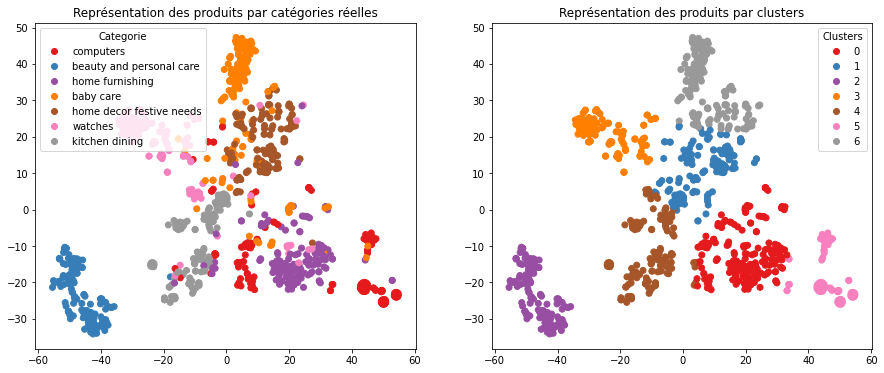

ARI :  0.5465


In [93]:
TSNE_visu_fct(X_tsne, y_cat_num, l_cat, labels, ARI)

## bigrams

In [94]:
from gensim.models.phrases import Phrases, Phraser


In [95]:
sent = [row.split() for row in data_final['description_clean']]
phrases = Phrases(sent, min_count=2, progress_per=10000)
bigram = Phraser(phrases)
sentences = bigram[sent]

In [96]:
word_freq = defaultdict(int)
for sent in sentences:
    for i in sent:
        word_freq[i] += 1
len(word_freq)

5561

In [97]:
w2v_size=300
w2v_window=2
w2v_min_count=3
w2v_epochs=500
maxlen = 100 # adapt to length of sentences


In [98]:
# Création et entraînement du modèle Word2Vec

print("Build & train Word2Vec model ...")
w2v_model = gensim.models.Word2Vec(min_count=w2v_min_count,
                                   window=w2v_window,
                                   vector_size=w2v_size,
                                   seed=42,
                                   workers=10 #workers=multiprocessing.cpu_count())
                                  )

w2v_model.build_vocab(sentences)
w2v_model.train(sentences, total_examples=w2v_model.corpus_count, epochs=w2v_epochs)
model_vectors = w2v_model.wv
w2v_words = model_vectors.index_to_key
print("Vocabulary size: %i" % len(w2v_words))
print("Word2Vec trained")

Build & train Word2Vec model ...
Vocabulary size: 2752
Word2Vec trained


In [99]:
# Préparation des sentences (tokenization)

print("Fit Tokenizer ...")
tokenizer = Tokenizer()
tokenizer.fit_on_texts(sentences)
x_sentences = pad_sequences(tokenizer.texts_to_sequences(sentences),
                                                     maxlen=maxlen,
                                                     padding='post') 
                                                   
num_words = len(tokenizer.word_index) + 1
print("Number of unique words: %i" % num_words)

Fit Tokenizer ...
Number of unique words: 5562


### Création de la matrice d'embedding

In [100]:
# Création de la matrice d'embedding

print("Create Embedding matrix ...")
w2v_size = 300
word_index = tokenizer.word_index
vocab_size = len(word_index) + 1
embedding_matrix = np.zeros((vocab_size, w2v_size))
i=0
j=0
    
for word, idx in word_index.items():
    i +=1
    if word in w2v_words:
        j +=1
        embedding_vector = model_vectors[word]
        if embedding_vector is not None:
            embedding_matrix[idx] = model_vectors[word]
            
word_rate = np.round(j/i,4)
print("Word embedding rate : ", word_rate)
print("Embedding matrix: %s" % str(embedding_matrix.shape))

Create Embedding matrix ...
Word embedding rate :  0.4949
Embedding matrix: (5562, 300)


### Création du modèle d'embedding

In [101]:
# Création du modèle

input=Input(shape=(len(x_sentences),maxlen),dtype='float64')
word_input=Input(shape=(maxlen,),dtype='float64')  
word_embedding=Embedding(input_dim=vocab_size,
                         output_dim=w2v_size,
                         weights = [embedding_matrix],
                         input_length=maxlen)(word_input)
word_vec=GlobalAveragePooling1D()(word_embedding)  
embed_model = Model([word_input],word_vec)

embed_model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 100)]             0         
                                                                 
 embedding_1 (Embedding)     (None, 100, 300)          1668600   
                                                                 
 global_average_pooling1d_1   (None, 300)              0         
 (GlobalAveragePooling1D)                                        
                                                                 
Total params: 1,668,600
Trainable params: 1,668,600
Non-trainable params: 0
_________________________________________________________________


### Exécution du modèle

In [102]:
embeddings = embed_model.predict(x_sentences)
embeddings.shape

(1050, 300)

In [103]:
import time

In [104]:
ARI, X_tsne, labels = ARI_fct(embeddings, l_cat, y_cat_num)

ARI :  0.3957 time :  19.0


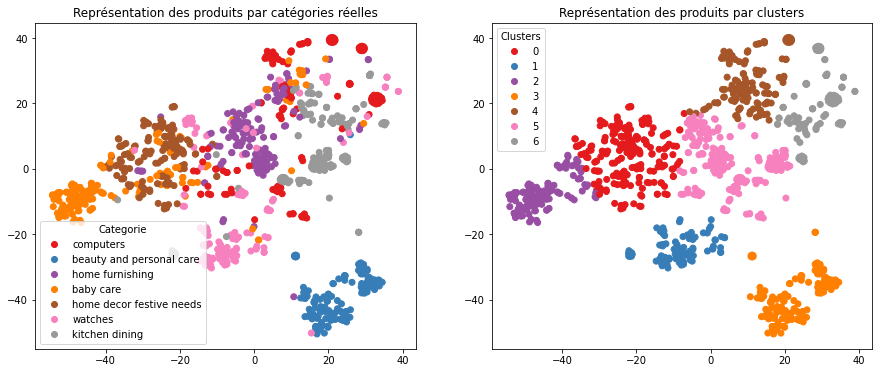

ARI :  0.3957


In [105]:
TSNE_visu_fct(X_tsne, y_cat_num, l_cat, labels, ARI)

## BERT

In [107]:
!pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 4.9 MB 18.7 MB/s 
     |████████████████████████████████| 163 kB 53.6 MB/s 
     |████████████████████████████████| 6.6 MB 66.5 MB/s 


In [108]:
import pandas as pd
from functions import *

import tensorflow as tf
# import tensorflow_hub as hub
import tensorflow.keras
from tensorflow.keras import backend as K

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras import metrics as kmetrics
from tensorflow.keras.layers import *
from tensorflow.keras.models import Model

# Bert
import os
import transformers
from transformers import AutoConfig, AutoModel, AutoTokenizer,TFAutoModel, TFBertModel

os.environ["TF_KERAS"]='1'

In [109]:
print(tf.__version__)
print(tensorflow.__version__)
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))
print(tf.test.is_built_with_cuda())

2.8.2
2.8.2
Num GPUs Available:  1
True


### Fonctions communes

In [110]:
# Fonction de préparation des sentences
def bert_inp_fct(sentences, bert_tokenizer, max_length) :
    input_ids=[]
    token_type_ids = []
    attention_mask=[]
    bert_inp_tot = []

    for sent in sentences:
        bert_inp = bert_tokenizer.encode_plus(sent,
                                              add_special_tokens = True,
                                              max_length = max_length,
                                              padding='max_length',
                                              return_attention_mask = True, 
                                              return_token_type_ids=True,
                                              truncation=True,
                                              return_tensors="tf")
    
        input_ids.append(bert_inp['input_ids'][0])
        token_type_ids.append(bert_inp['token_type_ids'][0])
        attention_mask.append(bert_inp['attention_mask'][0])
        bert_inp_tot.append((bert_inp['input_ids'][0], 
                             bert_inp['token_type_ids'][0], 
                             bert_inp['attention_mask'][0]))

    input_ids = np.asarray(input_ids)
    token_type_ids = np.asarray(token_type_ids)
    attention_mask = np.array(attention_mask)
    
    return input_ids, token_type_ids, attention_mask, bert_inp_tot
    

# Fonction de création des features
def feature_BERT_fct(model, model_type, sentences, max_length, b_size, mode='HF') :
    batch_size = b_size
    batch_size_pred = b_size
    bert_tokenizer = AutoTokenizer.from_pretrained(model_type)
    time1 = time.time()

    for step in range(len(sentences)//batch_size) :
        idx = step*batch_size
        input_ids, token_type_ids, attention_mask, bert_inp_tot = bert_inp_fct(sentences[idx:idx+batch_size], 
                                                                      bert_tokenizer, max_length)
        
        if mode=='HF' :    # Bert HuggingFace
            outputs = model.predict([input_ids, attention_mask, token_type_ids], batch_size=batch_size_pred)
            last_hidden_states = outputs.last_hidden_state

        if mode=='TFhub' : # Bert Tensorflow Hub
            text_preprocessed = {"input_word_ids" : input_ids, 
                                 "input_mask" : attention_mask, 
                                 "input_type_ids" : token_type_ids}
            outputs = model(text_preprocessed)
            last_hidden_states = outputs['sequence_output']
             
        if step ==0 :
            last_hidden_states_tot = last_hidden_states
            last_hidden_states_tot_0 = last_hidden_states
        else :
            last_hidden_states_tot = np.concatenate((last_hidden_states_tot,last_hidden_states))
    
    features_bert = np.array(last_hidden_states_tot).mean(axis=1)
    
    time2 = np.round(time.time() - time1,0)
    print("temps traitement : ", time2)
     
    return features_bert, last_hidden_states_tot

### BERT HuggingFace

In [113]:
from nltk.tokenize import sent_tokenize, word_tokenize

def transform_dl_fct(desc_text) :
    word_tokens = word_tokenize(desc_text)
    lw = [w.lower() for w in word_tokens]
    transf_desc_text = ' '.join(lw)
    return transf_desc_text

In [114]:
data_final["description_dl"] = data_final["description"].apply(transform_dl_fct)

In [115]:
max_length = 512
batch_size = 10
model_type = 'bert-base-uncased'
model = TFBertModel.from_pretrained(model_type)
sentences = data_final['description_dl'].to_list()

Downloading:   0%|          | 0.00/570 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/536M [00:00<?, ?B/s]

Some layers from the model checkpoint at bert-base-uncased were not used when initializing TFBertModel: ['nsp___cls', 'mlm___cls']
- This IS expected if you are initializing TFBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFBertModel were initialized from the model checkpoint at bert-base-uncased.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions without further training.


In [116]:
# Création des features

features_bert, last_hidden_states_tot = feature_BERT_fct(model, model_type, sentences, 
                                                         max_length, batch_size, mode='HF')

Downloading:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/232k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/466k [00:00<?, ?B/s]

temps traitement :  97.0


In [117]:
ARI, X_tsne, labels = ARI_fct(features_bert,l_cat, y_cat_num)

ARI :  0.3072 time :  10.0


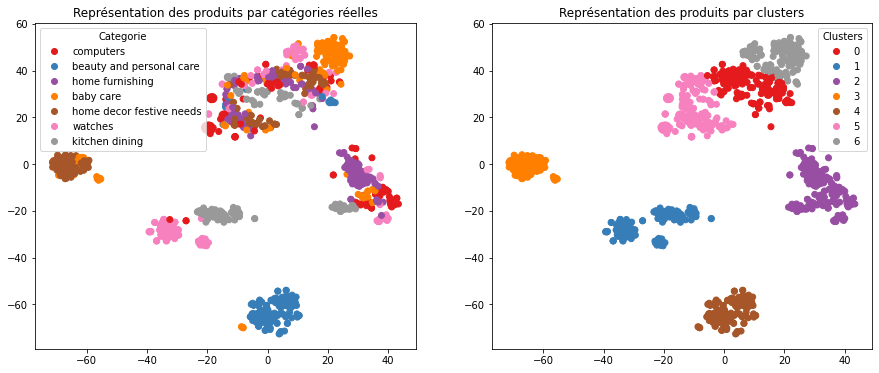

ARI :  0.3072


In [118]:
TSNE_visu_fct(X_tsne, y_cat_num,l_cat, labels, ARI)

### BERT hub Tensorflow

In [119]:
import tensorflow_hub as hub
#import tensorflow_text 

# Guide sur le Tensorflow hub : https://www.tensorflow.org/text/tutorials/classify_text_with_bert
model_url = 'https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/4'
bert_layer = hub.KerasLayer(model_url, trainable=True)

In [120]:
sentences = data_final['description_dl'].to_list()

In [121]:
max_length = 100
batch_size = 10
model_type = 'bert-base-uncased'
model = bert_layer

features_bert, last_hidden_states_tot = feature_BERT_fct(model, model_type, sentences, 
                                                         max_length, batch_size, mode='TFhub')

temps traitement :  15.0


In [122]:
ARI, X_tsne, labels = ARI_fct(features_bert, l_cat, y_cat_num)

ARI :  0.3259 time :  13.0


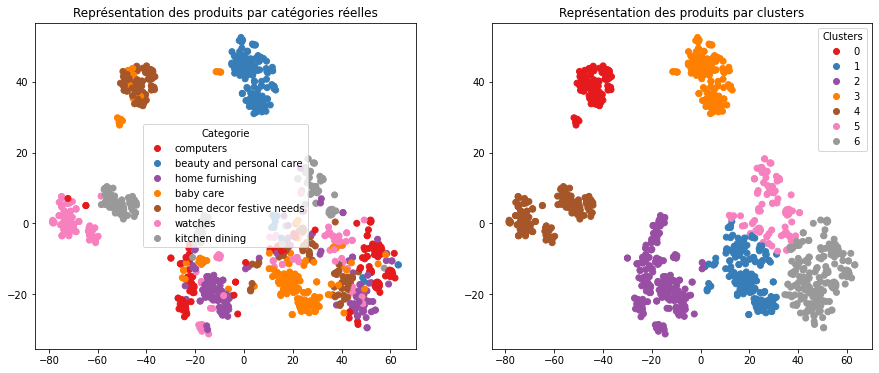

ARI :  0.3259


In [123]:
TSNE_visu_fct(X_tsne, y_cat_num, l_cat, labels, ARI)

In [11]:
from nltk.tokenize import sent_tokenize, word_tokenize

def transform_dl_fct(desc_text) :
    word_tokens = word_tokenize(desc_text)
    lw = [w.lower() for w in word_tokens]
    transf_desc_text = ' '.join(lw)
    return transf_desc_text

In [15]:
data_final["description_dl"] = data_final["description"].apply(transform_dl_fct)

In [16]:
data_final.head(5)

,categ_0,description,description_clean,description_dl
0,home furnishing,Key Features of Elegance Polyester Multicolor ...,elegance polyester abstract eyelet door curtai...,key features of elegance polyester multicolor ...
1,baby care,Specifications of Sathiyas Cotton Bath Towel (...,sathiyas cotton bath towel bath towel yellow b...,specifications of sathiyas cotton bath towel (...
2,baby care,Key Features of Eurospa Cotton Terry Face Towe...,eurospa cotton terry face towel small gsm euro...,key features of eurospa cotton terry face towe...
3,home furnishing,Key Features of SANTOSH ROYAL FASHION Cotton P...,santosh royal fashion cotton printed king size...,key features of santosh royal fashion cotton p...
4,home furnishing,Key Features of Jaipur Print Cotton Floral Kin...,jaipur print cotton floral king sized double b...,key features of jaipur print cotton floral kin...


In [31]:
l_cat = list(set(data_final['categ_0']))
y_cat_num = [(1-l_cat.index(data_final.iloc[i]['categ_0'])) for i in range(len(data_final))]

In [17]:
import tensorflow as tf

In [18]:
print(tf.__version__)
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))
print(tf.test.is_built_with_cuda())

2.8.2
Num GPUs Available:  0
True


In [19]:
import tensorflow_hub as hub
embed = hub.load("https://tfhub.dev/google/universal-sentence-encoder/4")

In [20]:
def feature_USE_fct(sentences, b_size) :
    batch_size = b_size
    time1 = time.time()

    for step in range(len(sentences)//batch_size) :
        idx = step*batch_size
        feat = embed(sentences[idx:idx+batch_size])

        if step ==0 :
            features = feat
        else :
            features = np.concatenate((features,feat))

    time2 = np.round(time.time() - time1,0)
    return features

In [22]:
batch_size = 10
sentences = data_final['description_dl'].to_list()

In [27]:
features_USE = feature_USE_fct(sentences, batch_size)

In [32]:
ARI, X_tsne, labels = ARI_fct(features_USE, l_cat, y_cat_num)

ARI :  0.452 time :  14.0


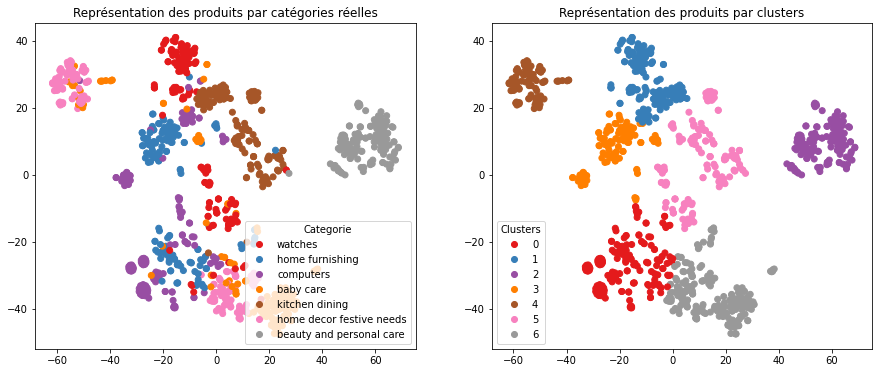

ARI :  0.452


In [33]:
TSNE_visu_fct(X_tsne, y_cat_num, l_cat, labels, ARI)

# Models

In [124]:
# Machine Learning
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelBinarizer

from tensorflow.keras import preprocessing as kprocessing
from tensorflow.keras import models, layers, optimizers

import transformers

# Visualization
from matplotlib import pyplot as plt

# Text processing
import re
import nltk
import gensim.downloader as api

# Various
from datetime import datetime

In [125]:
def final_clean(doc):
    new_doc = process_text(doc,
                           rejoin=True,
                           lemm_or_stemm="lem",
                           list_rare_words=None,
                           tag_to_keep=None,
                           min_len_word=3,
                           force_is_alpha=True,
                           engl_words=False,
                           keep_brands=True,
                           extra_words="duplicated_5",
                           no_duplicate=False)
    return new_doc

In [126]:
data_final["description_clean"] = data_final["description"].apply(final_clean)

In [127]:
df = data_final[["description","description_clean", "categ_0"]]

In [128]:
print('Total number of news: {}'.format(len(df)))
print(40*'-')
print('Split by category:')
print(df["categ_0"].value_counts())
print(40*'-')
nr_categories = len(df["categ_0"].unique())
print("Number of categories: {n}".format(n=nr_categories))

Total number of news: 1050
----------------------------------------
Split by category:
home furnishing             150
baby care                   150
watches                     150
home decor festive needs    150
kitchen dining              150
beauty and personal care    150
computers                   150
Name: categ_0, dtype: int64
----------------------------------------
Number of categories: 7


## LR and Tfidf

In [129]:
# Renaming, Input -> X, Output -> y
X = df['description_clean']
y = df['categ_0']
# Split into Training and Test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=df['categ_0'])

In [130]:
corpus = X_train
# Initizalize the vectorizer with max nr words and ngrams (1: single words, 2: two words in a row)
vectorizer_tfidf = TfidfVectorizer(max_features=15000, ngram_range=(1,2))
# Fit the vectorizer to the training data
vectorizer_tfidf.fit(corpus)
TfidfVectorizer(max_features=15000, ngram_range=(1, 2))

TfidfVectorizer(max_features=15000, ngram_range=(1, 2))

In [131]:
classifier_tfidf = LogisticRegression()
model_tfidf = Pipeline([("vectorizer", vectorizer_tfidf), ("classifier", classifier_tfidf)])

start_time = datetime.now()
model_tfidf.fit(X_train, y_train)
end_time = datetime.now()

training_time_tfidf = (end_time - start_time).total_seconds()

In [132]:
predicted_train_tfidf = model_tfidf.predict(X_train)
accuracy_train_tfidf = accuracy_score(y_train, predicted_train_tfidf)
print('Accuracy Training data: {:.1%}'.format(accuracy_train_tfidf))

predicted_test_tfidf = model_tfidf.predict(X_test)
accuracy_test_tfidf = accuracy_score(y_test, predicted_test_tfidf)
accuracy_tfidf = accuracy_test_tfidf
print('Accuracy Test data: {:.1%}'.format(accuracy_test_tfidf))

print('Training time: {:.1f}s'.format(training_time_tfidf))


Accuracy Training data: 98.9%
Accuracy Test data: 94.0%
Training time: 0.7s


In [133]:
print('Classes of the model: ',classifier_tfidf.classes_)
print(80*'-')
print('Shape of the coefficients of the model (categories x vocabulary size): ',classifier_tfidf.coef_.shape)
print(80*'-')
NN = 10
# Get the 10 (here: NN, which you can adjust yourself) ids of the words with highest weights per category
top_words = np.argsort(classifier_tfidf.coef_,axis=1)[:,-NN:]

# Get the vocabulary of the model (mapping of words to ids):
voc = vectorizer_tfidf.vocabulary_
# Get the inverse vocabulary to map the ids of the words to the words:
inv_voc = {v: k for k, v in voc.items()}

# Get for each category (=class) the top ten words
for n, w in enumerate(classifier_tfidf.classes_):
    t = w + ': '
    for i in range(NN):
        t += inv_voc[top_words[n,i]]
        if i!=NN:
            t+=', '
    print(t)
    print(80*'-')

Classes of the model:  ['baby care' 'beauty and personal care' 'computers'
 'home decor festive needs' 'home furnishing' 'kitchen dining' 'watches']
--------------------------------------------------------------------------------
Shape of the coefficients of the model (categories x vocabulary size):  (7, 12466)
--------------------------------------------------------------------------------
baby care: dress, sticker, boy, fabric, baby boy, detail, cotton, baby girl, girl, baby, 
--------------------------------------------------------------------------------
beauty and personal care: spf, kit, lipstick, lip, vanity, jewellery, denver, hair, lowest, combo, 
--------------------------------------------------------------------------------
computers: laptop battery, adapter, cell, router, wireless, battery, edimax, tenda, laptop, usb, 
--------------------------------------------------------------------------------
home decor festive needs: decorative, handicraft, statue, wooden, ganesha, 

In [135]:
ARI = np.round(metrics.adjusted_rand_score(y_test, predicted_test_tfidf),4)
ARI

0.8657

## Word2vec and RNN
Recurrent Neural Network

In [136]:
# Renaming, Input -> X, Output -> y
X_tf = df['description_clean']
y_tf_class = df['categ_0']

# Convert labels into a one-hot vector of size 7 (the number of distinct labels)
lab = LabelBinarizer()
lab.fit(y_tf_class)
y_tf = lab.transform(y_tf_class)

# Example (you can modify n)
n=100
print('Coding of labels into a one-hot vector: ' + y_tf_class[n] + ' is ', y_tf[n])

# Split into training and test data
X_tf_train, X_tf_test, y_tf_train, y_tf_test = train_test_split(X_tf, y_tf, test_size=0.3, random_state=42, stratify=df['categ_0'])

Coding of labels into a one-hot vector: beauty and personal care is  [0 1 0 0 0 0 0]


In [137]:

corpus = X_tf_train
max_words = 3585
tokenizer = kprocessing.text.Tokenizer(lower=True, split=' ', num_words=max_words, oov_token="<pad>", filters='!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n')
tokenizer.fit_on_texts(corpus)
voc = tokenizer.word_index
reverse_voc = dict([(value, key) for (key, value) in voc.items()])

In [138]:
max_len = 200

sequences = tokenizer.texts_to_sequences(X_tf_train)
X_tf_train_seq = kprocessing.sequence.pad_sequences(sequences, maxlen=max_len)

# Apply the same to test data
X_tf_test_seq = kprocessing.sequence.pad_sequences(tokenizer.texts_to_sequences(X_tf_test), maxlen=max_len)

n=120 # You can adjust n
print('Shape: ',X_tf_train_seq.shape)
print(100*'-')
print('Example: ',X_tf_train_seq[n,:])

Shape:  (735, 200)
----------------------------------------------------------------------------------------------------
Example:  [   0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0 2538 2539 2540  706 2541 1603
  424  425 1604   

In [139]:
# This may take several minutes
w2v = api.load("word2vec-google-news-300")
# Example of a word representation:
w2v['hello'].shape

[==================================================] 100.0% 1662.8/1662.8MB downloaded


(300,)

In [140]:
max_words = 3384

In [141]:
# Build weights of the embbeddings matrix using w2v
emb_matrix=np.zeros((max_words+1, 300))
for i in range(max_words):
    w = reverse_voc[i+1]
    if w in w2v:
        emb_matrix[i+1,:] = w2v[w]
emb_size = emb_matrix.shape[1]

In [142]:
input_ = layers.Input(shape = X_tf_train_seq[0,:].shape,name='input')
# Embedding layer (voc size plus un ("UNK", word with index 0)), using the pre-trained emb_matrix obtained from Word2Vec
x = layers.Embedding(max_words+1,emb_size,weights=[emb_matrix],trainable=False, name='embedding')(input_)
x = layers.Bidirectional(layers.LSTM(15,dropout=0.2),name='bidirectional-lstm')(x) # LSTM layer
x = layers.Dropout(0.2, name='dropout')(x)
x = layers.Dense(64, activation='relu', name='dense')(x)
output = layers.Dense(nr_categories,activation='softmax', name='classification')(x)

model = models.Model(input_, output)

opt = optimizers.Adam(learning_rate=0.01, beta_1=0.9)
model.compile(optimizer=opt,loss='categorical_crossentropy', metrics=['accuracy'])

In [143]:

model.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input (InputLayer)          [(None, 200)]             0         
                                                                 
 embedding (Embedding)       (None, 200, 300)          1015500   
                                                                 
 bidirectional-lstm (Bidirec  (None, 30)               37920     
 tional)                                                         
                                                                 
 dropout (Dropout)           (None, 30)                0         
                                                                 
 dense (Dense)               (None, 64)                1984      
                                                                 
 classification (Dense)      (None, 7)                 455       
                                                           

In [144]:
start_time = datetime.now()
history = model.fit(X_tf_train_seq, y_tf_train, batch_size=32, shuffle=True, epochs=15, validation_data=(X_tf_test_seq, y_tf_test))
end_time = datetime.now()

training_time_rnn = (end_time - start_time).total_seconds()

Epoch 1/15
23/23 [==============================] - 9s 93ms/step - loss: 1.2824 - accuracy: 0.5565 - val_loss: 0.6415 - val_accuracy: 0.7968
Epoch 2/15
23/23 [==============================] - 0s 19ms/step - loss: 0.6209 - accuracy: 0.8000 - val_loss: 0.3965 - val_accuracy: 0.8667
Epoch 3/15
23/23 [==============================] - 0s 19ms/step - loss: 0.4014 - accuracy: 0.8680 - val_loss: 0.3219 - val_accuracy: 0.9079
Epoch 4/15
23/23 [==============================] - 0s 19ms/step - loss: 0.2663 - accuracy: 0.9211 - val_loss: 0.2799 - val_accuracy: 0.9206
Epoch 5/15
23/23 [==============================] - 0s 19ms/step - loss: 0.1931 - accuracy: 0.9374 - val_loss: 0.2912 - val_accuracy: 0.9143
Epoch 6/15
23/23 [==============================] - 0s 19ms/step - loss: 0.1435 - accuracy: 0.9673 - val_loss: 0.3166 - val_accuracy: 0.9175
Epoch 7/15
23/23 [==============================] - 0s 19ms/step - loss: 0.1597 - accuracy: 0.9537 - val_loss: 0.3374 - val_accuracy: 0.9111
Epoch 8/15
23

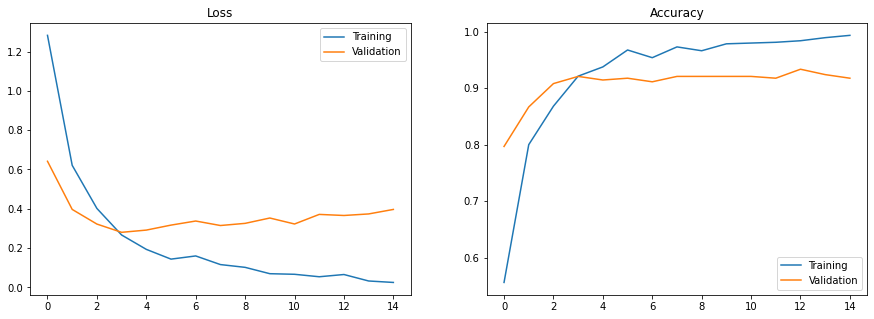

In [145]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))
ax[0].set(title='Loss')
ax[0].plot(history.history['loss'], label='Training')
ax[0].plot(history.history['val_loss'], label='Validation')
ax[0].legend(loc="upper right")

ax[1].set(title='Accuracy')
ax[1].plot(history.history['accuracy'], label='Training')
ax[1].plot(history.history['val_accuracy'], label='Validation')
ax[1].legend(loc="lower right")

In [146]:
accuracy_rnn = history.history['val_accuracy'][-1]
print('Accuracy Training data: {:.1%}'.format(history.history['accuracy'][-1]))
print('Accuracy Test data: {:.1%}'.format(history.history['val_accuracy'][-1]))
print('Training time: {:.1f}s'.format(training_time_rnn))

Accuracy Training data: 99.3%
Accuracy Test data: 91.7%
Training time: 15.0s


## Deep learning and BERT

In [147]:
# Renaming, Input -> X, Output -> y
X_bert = df['description']
y_bert_class = df['categ_0']

# Convert labels into a one-hot vector of size 7 (the number of distinct labels)
lab = LabelBinarizer()
lab.fit(y_bert_class)
y_bert = lab.transform(y_bert_class)

# Example (you can modify n)
n=100
print('Coding of labels into a one-hot vector: ' + y_bert_class[n] + ' is ', y_bert[n])

Coding of labels into a one-hot vector: beauty and personal care is  [0 1 0 0 0 0 0]


In [148]:
# distil-bert tokenizer
tokenizer_bert = transformers.DistilBertTokenizer.from_pretrained('distilbert-base-uncased')
X_bert = [tokenizer_bert(text, padding='max_length', max_length = 512, truncation=True)['input_ids'] for text in X_bert]
X_bert = np.array(X_bert, dtype='int32')

Downloading:   0%|          | 0.00/232k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/483 [00:00<?, ?B/s]

In [149]:
# Train/test split
X_bert_train, X_bert_test, y_bert_train, y_bert_test = train_test_split(X_bert, y_bert, test_size=0.3, random_state=42, stratify=df['categ_0'])
print('Shape of training data: ',X_bert_train.shape)

Shape of training data:  (735, 512)


In [150]:
config = transformers.DistilBertConfig(dropout=0.2, attention_dropout=0.2)
dbert = transformers.TFDistilBertModel.from_pretrained('distilbert-base-uncased', config=config, trainable=False)

Downloading:   0%|          | 0.00/363M [00:00<?, ?B/s]

Some layers from the model checkpoint at distilbert-base-uncased were not used when initializing TFDistilBertModel: ['vocab_layer_norm', 'vocab_transform', 'vocab_projector', 'activation_13']
- This IS expected if you are initializing TFDistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFDistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFDistilBertModel were initialized from the model checkpoint at distilbert-base-uncased.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFDistilBertModel for predictions without further training.


In [151]:
# Let's create a sampe of size 5 from the training data
sample = X_bert_train[0:5]
print('Object type: ', type(dbert(sample)))
print('Output format (shape): ',dbert(sample)[0].shape)
print('Output used as input for the classifier (shape): ', dbert(sample)[0][:,0,:].shape)

Object type:  <class 'transformers.modeling_tf_outputs.TFBaseModelOutput'>
Output format (shape):  (5, 512, 768)
Output used as input for the classifier (shape):  (5, 768)


In [152]:
input_ids_in = layers.Input(shape=(512,), name='input_token', dtype='int32')

x = dbert(input_ids=input_ids_in)[0][:,0,:]
x = layers.Dropout(0.2, name='dropout')(x)
x = layers.Dense(64, activation='relu', name='dense')(x)
x = layers.Dense(7, activation='softmax', name='classification')(x)

dmodel = models.Model(inputs=input_ids_in, outputs = x)

dmodel.compile(optimizer='adam',loss='categorical_crossentropy', metrics=['accuracy'])

In [153]:
dmodel.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_token (InputLayer)    [(None, 512)]             0         
                                                                 
 tf_distil_bert_model (TFDis  TFBaseModelOutput(last_h  66362880 
 tilBertModel)               idden_state=(None, 512,             
                             768),                               
                              hidden_states=None, att            
                             entions=None)                       
                                                                 
 tf.__operators__.getitem (S  (None, 768)              0         
 licingOpLambda)                                                 
                                                                 
 dropout (Dropout)           (None, 768)               0         
                                                           

In [154]:
# Train the model
start_time = datetime.now()
history = dmodel.fit(X_bert_train, y_bert_train, batch_size=32, shuffle=True, epochs=25, validation_data=(X_bert_test, y_bert_test))
end_time = datetime.now()

training_time_bert = (end_time - start_time).total_seconds()

Epoch 1/25
23/23 [==============================] - 28s 984ms/step - loss: 1.9778 - accuracy: 0.1769 - val_loss: 1.9541 - val_accuracy: 0.2032
Epoch 2/25
23/23 [==============================] - 21s 932ms/step - loss: 1.9178 - accuracy: 0.2000 - val_loss: 1.8553 - val_accuracy: 0.2571
Epoch 3/25
23/23 [==============================] - 21s 945ms/step - loss: 1.8575 - accuracy: 0.2313 - val_loss: 1.8034 - val_accuracy: 0.2444
Epoch 4/25
23/23 [==============================] - 22s 956ms/step - loss: 1.8279 - accuracy: 0.2653 - val_loss: 1.7483 - val_accuracy: 0.3333
Epoch 5/25
23/23 [==============================] - 22s 965ms/step - loss: 1.7841 - accuracy: 0.3116 - val_loss: 1.6912 - val_accuracy: 0.3683
Epoch 6/25
23/23 [==============================] - 22s 977ms/step - loss: 1.7567 - accuracy: 0.3388 - val_loss: 1.7290 - val_accuracy: 0.3079
Epoch 7/25
23/23 [==============================] - 22s 986ms/step - loss: 1.7036 - accuracy: 0.3442 - val_loss: 1.6156 - val_accuracy: 0.4317

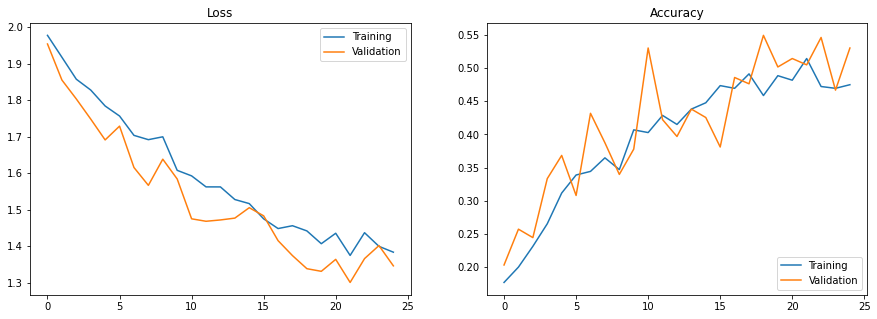

In [155]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))
ax[0].set(title='Loss')
ax[0].plot(history.history['loss'], label='Training')
ax[0].plot(history.history['val_loss'], label='Validation')
ax[0].legend(loc="upper right")

ax[1].set(title='Accuracy')
ax[1].plot(history.history['accuracy'], label='Training')
ax[1].plot(history.history['val_accuracy'], label='Validation')
ax[1].legend(loc="lower right")

In [156]:
accuracy_bert = history.history['val_accuracy'][-1]
print('Accuracy Training data: {:.1%}'.format(history.history['accuracy'][-1]))
print('Accuracy Test data: {:.1%}'.format(history.history['val_accuracy'][-1]))
print('Training time: {:.1f}s (or {:.1f} minutes)'.format(training_time_bert, training_time_bert/60))

Accuracy Training data: 47.5%
Accuracy Test data: 53.0%
Training time: 628.1s (or 10.5 minutes)


In [157]:
method = ['TF-IDF LR', 'RNN Word2vec', 'BERT']
accuracy = [accuracy_tfidf, accuracy_rnn, accuracy_bert]
accuracy = [str(round(acc*100, 1))+'%' for acc in accuracy]
training_time = [round(training_time_tfidf,1), round(training_time_rnn,1), round(training_time_bert,1)]
training_time_rounded = [round(tt,1) for tt in training_time]
training_time = np.array(training_time)
training_time_x = list(training_time /min(training_time))
training_time_x = [str(round(ttx,1))+'x' for ttx in training_time_x]

dict = {'Method' : method,
        'Accuracy' : accuracy,
        'Training Time [s]' : training_time_rounded,
        'Training Time [x]' : training_time_x}
df = pd.DataFrame(dict)
display(df)

,Method,Accuracy,Training Time [s],Training Time [x]
0,TF-IDF LR,94.0%,0.7,1.0x
1,RNN Word2vec,91.7%,15.0,21.4x
2,BERT,53.0%,628.1,897.3x
